In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import streamlit as st
import pickle
import matplotlib.pyplot as plt
import seaborn as sns


In [22]:
%matplotlib inline


In [5]:
# Load dataset
file_path = 'Restaurant_Reviews.tsv'
data = pd.read_csv(file_path, sep='\t')

In [6]:
print(data.head())


                                              Review  Liked
0                           Wow... Loved this place.      1
1                                 Crust is not good.      0
2          Not tasty and the texture was just nasty.      0
3  Stopped by during the late May bank holiday of...      1
4  The selection on the menu was great and so wer...      1


In [8]:
# Preprocessing
data['Review'] = data['Review'].str.lower().str.replace('[^a-z ]', '')
X = data['Review']
y = data['Liked']

In [9]:
vectorizer = CountVectorizer(stop_words='english')
X_vectorized = vectorizer.fit_transform(X)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)


In [11]:
model = MultinomialNB()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


Accuracy: 0.755


In [16]:
with open('sentiment_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)
    print("model saved successfully!")

model saved successfully!


In [17]:
with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)
    print("vectorizer saved successfully!")

vectorizer saved successfully!


In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

In [27]:
# Separate positive and negative reviews
positive_reviews = data[data['Liked'] == 1]['Review']
negative_reviews = data[data['Liked'] == 0]['Review']


In [28]:
# Preprocess and vectorize
vectorizer = CountVectorizer(stop_words='english')
positive_vectorized = vectorizer.fit_transform(positive_reviews)
negative_vectorized = vectorizer.fit_transform(negative_reviews)

In [29]:
# Get word counts
positive_words = Counter(dict(zip(vectorizer.get_feature_names_out(), positive_vectorized.toarray().sum(axis=0))))
negative_words = Counter(dict(zip(vectorizer.get_feature_names_out(), negative_vectorized.toarray().sum(axis=0))))

In [30]:
# Top 10 words
top_positive_words = positive_words.most_common(10)
top_negative_words = negative_words.most_common(10)


In [32]:
# Visualize Top Words
def plot_top_words(top_words, title, color):
    words, counts = zip(*top_words)
    plt.figure(figsize=(8, 5))
    plt.bar(words, counts, color=color)
    plt.title(title, fontsize=16)
    plt.xlabel('Words', fontsize=12)
    plt.ylabel('Counts', fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.show()

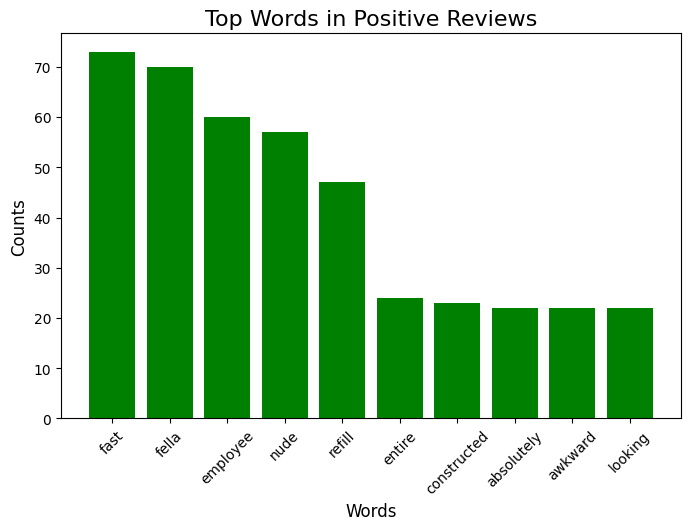

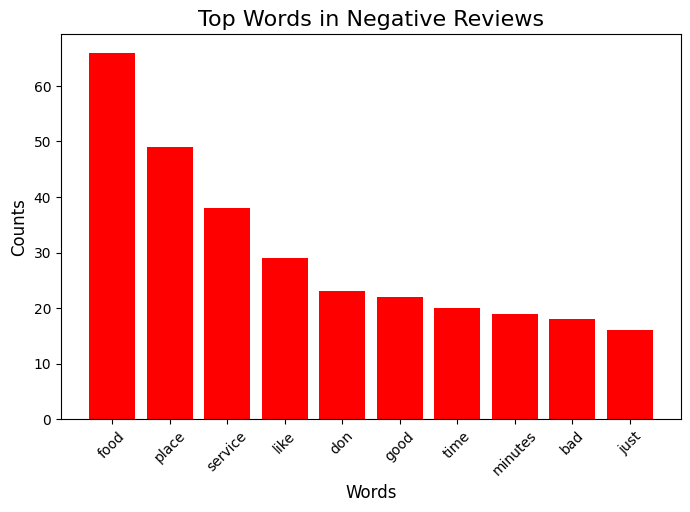

In [33]:
plot_top_words(top_positive_words, "Top Words in Positive Reviews", "green")
plot_top_words(top_negative_words, "Top Words in Negative Reviews", "red")